In [1]:
import sys
from pathlib import Path
import os

In [2]:
file = Path(os.path.abspath('')).resolve()
parent, root = file.parent, file.parents[0]
sys.path.append(str(root))

In [60]:
import numpy as np
from libs.utils import get_present_rings, get_rings
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
p = np.array([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]])

In [58]:
slice_number = 25
n_cols = 10
pix_col = 512/n_cols
N_PIXEL_H = 496
N_PIXEL_W = 512
ring_diameters = [1, 3, 6]

In [59]:
mask_generator = get_rings(ring_diameters, 49, N_PIXEL_H, N_PIXEL_W)

present_rings = get_present_rings(np.array([slice_number]), return_tensor=False)

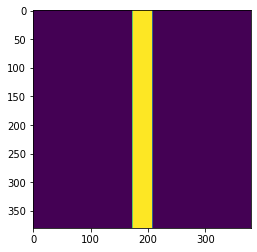

In [61]:
plt.imshow(mask_generator[0][..., 20])

In [7]:
def get_lines(mask):
    lines = {'1mm': [], '3mm': [], '6mm': []}
    for i_ring, ring in enumerate(lines.keys()):
        for i in range(1, len(mask[i_ring])):
            if mask[i_ring][i] != mask[i_ring][i - 1]:
                lines[ring].append(i)
    return lines

In [8]:
def get_lines_sorted(mask):
    lines = []
    for i_ring, ring in enumerate(mask):
        for i in range(1, len(mask[i_ring])):
            if mask[i_ring][i] != mask[i_ring][i - 1]:
                lines.append(i)
    lines.append(len(mask[i_ring]))
    lines = sorted(set(lines))
    return lines

In [26]:
mask = [mask_generator[i][0, :, slice_number] for i in range(len(mask_generator))]

In [27]:
l = get_lines(mask)

In [28]:
l

{'1mm': [212, 301], '3mm': [118, 212, 301, 395], '6mm': [118, 395]}

In [29]:
118/pix_col

2.3046875

In [30]:
get_lines_sorted(mask)

[118, 212, 301, 395, 512]

In [31]:
start_ring = 0
res = []
for i in get_lines_sorted(mask):
    end_ring = math.ceil(i / pix_col)
    res.append(np.max(p[:, start_ring:end_ring+1]))
    start_ring = end_ring
    

In [32]:
np.max(p[:, 0:2+1])

0.2

In [33]:
res

[0.3, 0.5, 0.6, 0.8, 0.9]

In [34]:
if np.sum(present_rings) == 1:
    predicted_rings = [0, 0, res[1]]
elif np.sum(present_rings) == 2:
    if len(res) == 5:
        predicted_rings = [0, res[2], max(res[1], res[3])]
    else:
        predicted_rings = [0, res[1], max(res[0], res[2])] 
else:
    predicted_rings = [res[2], max(res[1], res[3]), max(res[0], res[-1])]

In [35]:
present_rings

array([[1., 1., 1.]], dtype=float32)

In [36]:
np.sum(present_rings)

3.0

In [37]:
predicted_rings

[0.6, 0.8, 0.9]

In [52]:
def convert_to_rings(p, slice_numbers, mask_generator):
    predicted_rings = np.empty((p.shape[0], 3))
    for i_slice, slice_number_arr in enumerate(slice_numbers):
        print(slice_number_arr)
        slice_number = slice_number_arr[0]
        mask = [mask_generator[i][0, :, slice_number] for i in range(len(mask_generator))]
        present_rings = get_present_rings(np.array([slice_number]), return_tensor=False)
        
        start_ring = 0
        res = []
        
        for i in get_lines_sorted(mask):
            print(i)
            end_ring = math.ceil(i / pix_col)
            res.append(np.max(p[i_slice, start_ring:end_ring+1]))
            start_ring = end_ring
        
        print(res)

        if np.sum(present_rings) == 1:
            predicted_rings[i_slice] = [0, 0, res[1]]
        elif np.sum(present_rings) == 2:
            if len(res) == 5:
                predicted_rings[i_slice] = [0, res[2], max(res[1], res[3])]
            else:
                predicted_rings[i_slice] = [0, res[1], max(res[0], res[2])] 
        else:
            predicted_rings[i_slice] = [res[2], max(res[1], res[3]), max(res[0], res[-1])]
    
    return predicted_rings    

In [53]:
p = np.array([[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
             [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]])

In [56]:
slice_numbers = np.array([[10], [20]])

In [57]:
convert_to_rings(p, slice_numbers, mask_generator)

[10]
23
490
512


ValueError: zero-size array to reduction operation maximum which has no identity